# Spatial Analysis of the S&P 500
This is a thorough point pattern analysis of the S&P 500. Including a combination of joinplots, a centrography analysis, and central tendencies.

In [4]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [8]:
import geopandas as gpd
companies_gdf = gpd.read_file("Fortune_500_Corporate_Headquarters.geojson")
locations = ['RANK', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'COUNTY', 'LATITUDE', 'LONGITUDE', 'COUNTYFIPS', 'geometry']
companies_gdf = companies_gdf[locations]
companies_gdf.sample(12)

,RANK,NAME,ADDRESS,CITY,STATE,ZIP,COUNTY,LATITUDE,LONGITUDE,COUNTYFIPS,geometry
223,436.0,REGIONS FINANCIAL,1900 5TH AVENUE NORTH,BIRMINGHAM,AL,35203,JEFFERSON,33.51806,-86.80907,01073,POINT (-86.80907 33.51806)
228,252.0,STRYKER,2825 AIRVIEW BOULEVARD,KALAMAZOO,MI,49002,KALAMAZOO,42.24191,-85.55651,26077,POINT (-85.55651 42.24191)
490,350.0,SPARTANNASH,850 76TH STREET SW,BYRON CENTER,MI,49315,KENT,42.82551,-85.68454,26081,POINT (-85.68454 42.82551)
10,166.0,PNC FINANCIAL SERVICES GROUP,249 5TH AVENUE,PITTSBURGH,PA,15222,ALLEGHENY,40.44129,-80.00051,42003,POINT (-80.00051 40.44129)
196,355.0,QUANTA SERVICES,2800 POST OAK BOULEVARD,HOUSTON,TX,77056,HARRIS,29.73599,-95.46125,48201,POINT (-95.46125 29.73599)
200,250.0,STANLEY BLACK & DECKER,1000 STANLEY DRIVE,NEW BRITAIN,CT,06053,HARTFORD,41.69301,-72.80698,09003,POINT (-72.80698 41.69301)
205,158.0,SUPERVALU,7075 FLYING CLOUD DRIVE,EDEN PRAIRIE,MN,55344,HENNEPIN,44.87500,-93.41186,27053,POINT (-93.41186 44.87500)
443,387.0,NVIDIA,2788 SAN TOMAS EXPRESSWAY,SANTA CLARA,CA,95051,SANTA CLARA,37.37173,-121.96588,06085,POINT (-121.96588 37.37173)
165,311.0,MOHAWK INDUSTRIES,160 SOUTH INDUSTRIAL BOULEVARD,CALHOUN,GA,30701,GORDON,34.47421,-84.93784,13129,POINT (-84.93784 34.47421)
74,251.0,PARKER-HANNIFIN,6035 PARKLAND BOULEVARD,CLEVELAND,OH,44124,CUYAHOGA,41.50688,-81.46095,39035,POINT (-81.46095 41.50688)


## Joint Plots

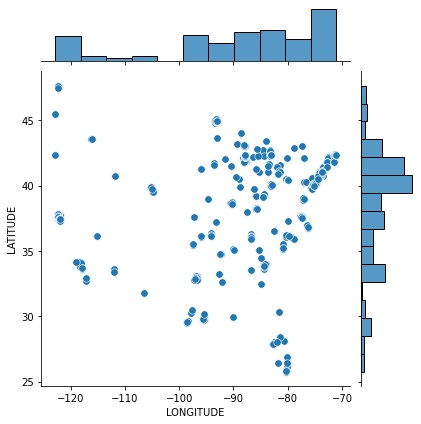

In [18]:
# scatterplot with edges
g = sns.jointplot(data = companies_gdf,
                  x='LONGITUDE', 
                  y='LATITUDE',
                  s=55)

The above joint plot shows us that a majority of S&P 500 companies tend to be located around North Eastern United States.

## Centrography

In [27]:
# compute the mean and median centers
mean_center = centrography.mean_center(companies_gdf[['LONGITUDE','LATITUDE']])
med_center = centrography.euclidean_median(companies_gdf[['LONGITUDE','LATITUDE']])
major, minor, rotation = centrography.ellipse(companies_gdf[['LONGITUDE','LATITUDE']])

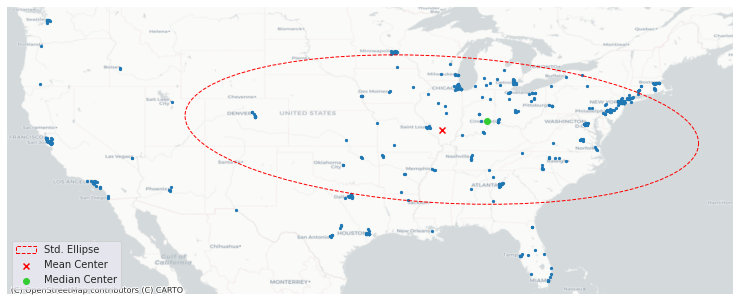

In [32]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(13, 13))

# Plot points
ax.scatter(companies_gdf['LONGITUDE'], companies_gdf['LATITUDE'], s=5)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

The above centrography plot shows us that mean center is slightly to the east of the center of the United States and the median center is more east and even slightly north of the center of the United States. The standard deviation ellipse shows that companies vary significantly more from east and west then north and south.

## Ellipse by State

In [36]:
def company_ellipse(state):
    
    # filter the data by race
    state_filtered = companies_gdf[(companies_gdf.STATE == state)]

    # mean center and median
    mean_center = centrography.mean_center(state_filtered[['LONGITUDE','LATITUDE']])
    med_center = centrography.euclidean_median(state_filtered[['LONGITUDE','LATITUDE']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(state_filtered[['LONGITUDE','LATITUDE']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(13, 13))

    # plot crime points
    ax.scatter(state_filtered['LONGITUDE'], state_filtered['LATITUDE'], s=3)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    # add the legend
    ax.legend()

    # no axix
    ax.axis('Off')

    # add a dynamic title
    ax.set_title("Companies in " + state)

    # add a basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326',
                    source=ctx.providers.CartoDB.Positron)
    # Display
    plt.show()

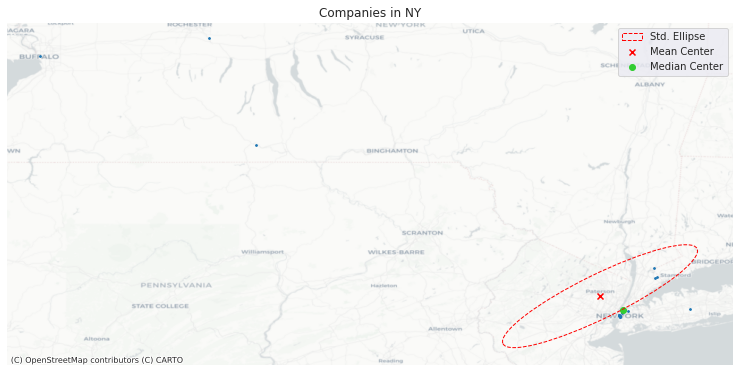

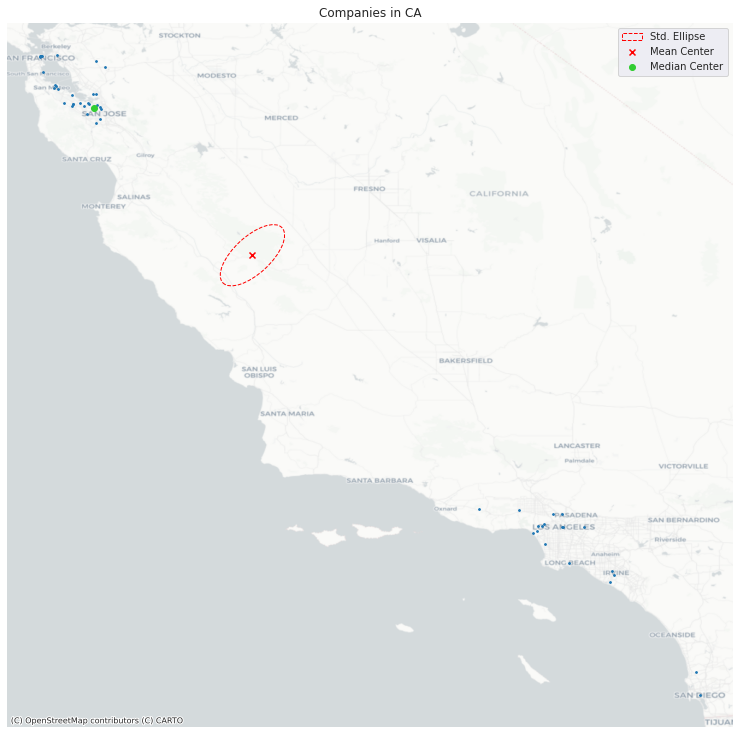

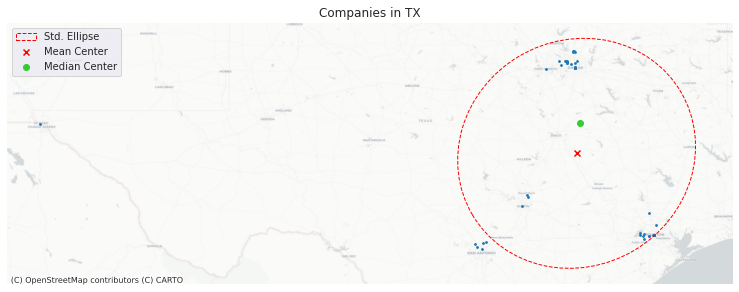

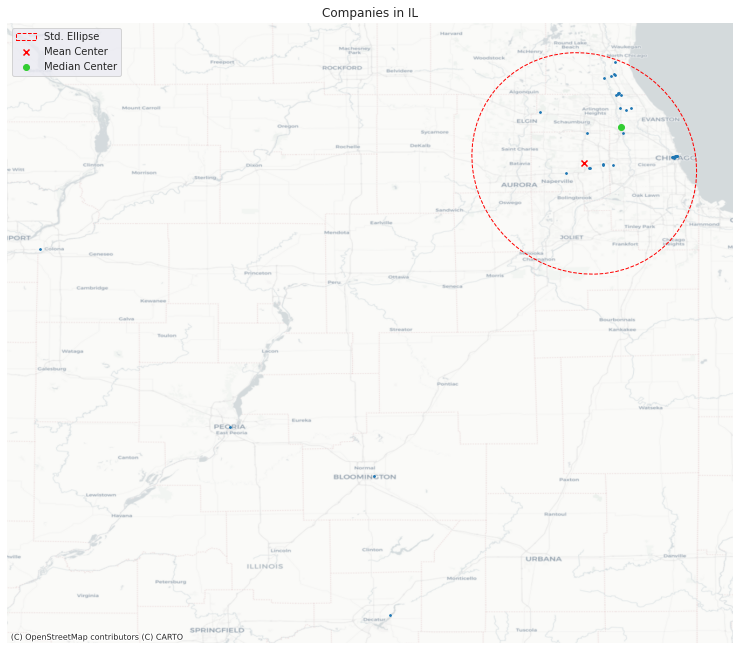

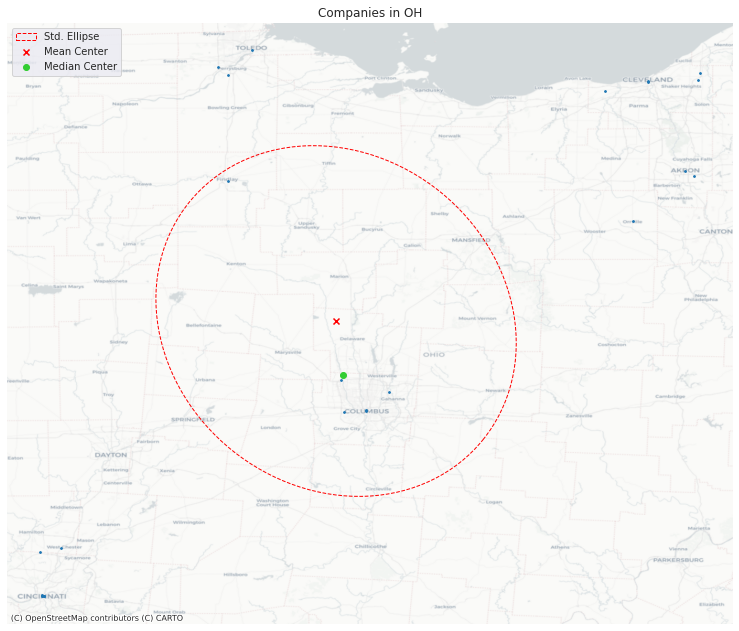

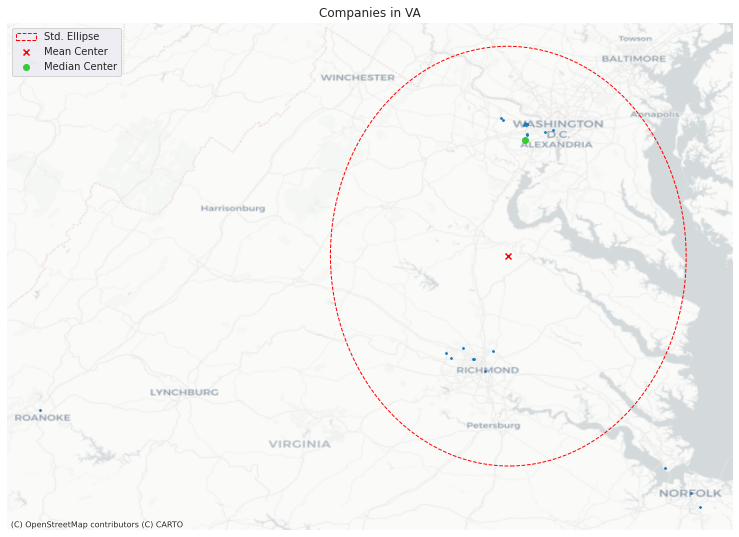

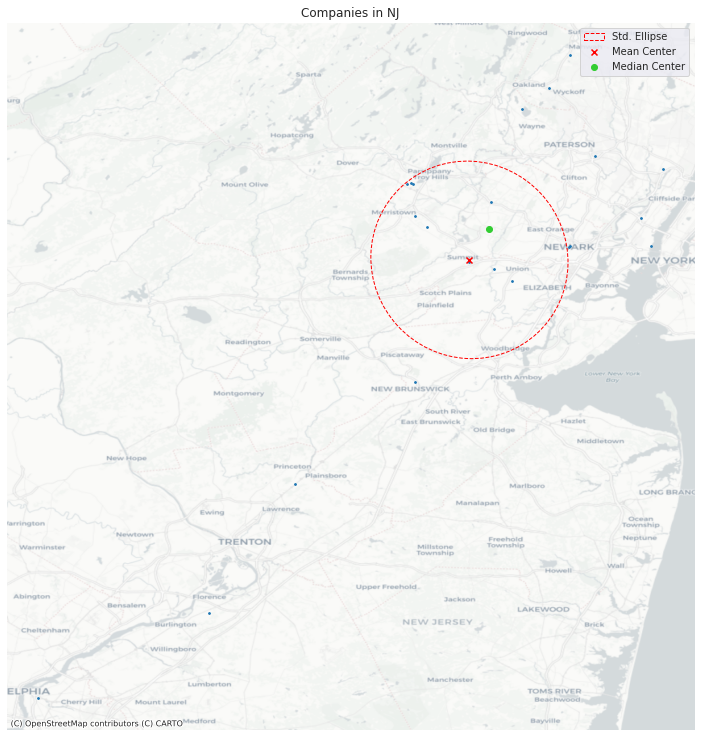

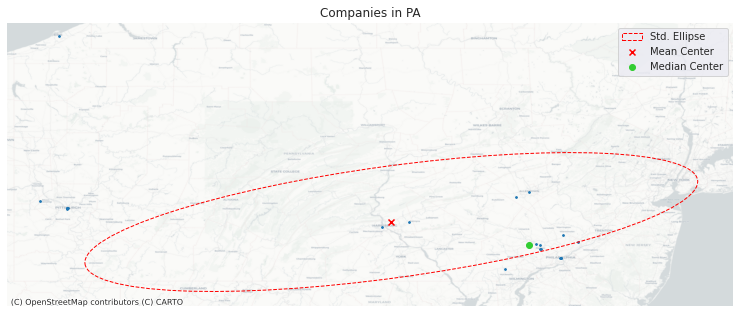

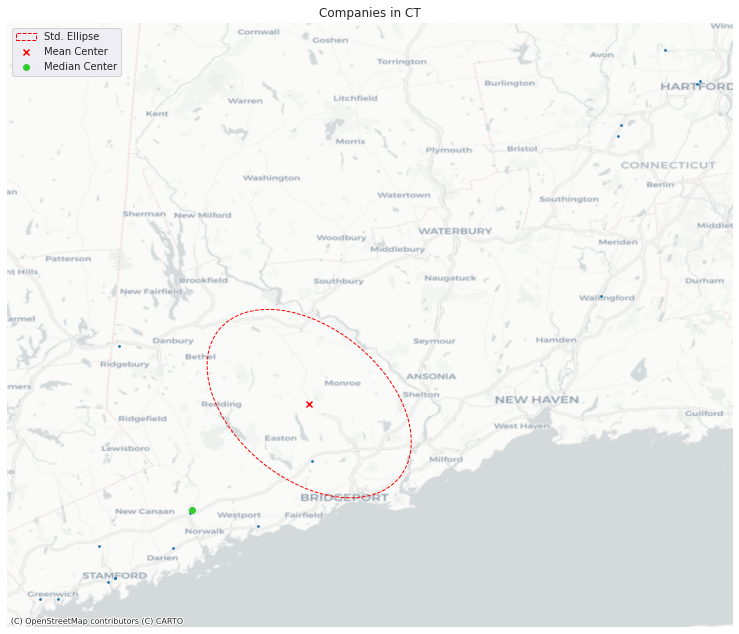

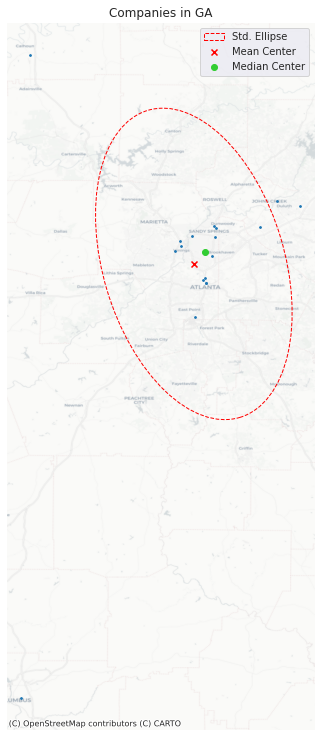

In [37]:
# get top 10 states
top10states = companies_gdf['STATE'].value_counts().head(10).index.tolist()
for state in top10states:
    company_ellipse(state)

The above are 10 different maps of companies by state (top 10 states) including the mean center, median center, and std. ellipse.

By Ariel Hanasab